In [1]:
import pandas as pd
import numpy as np
from random import randint, random
import seaborn as sns

In [2]:
def get_neighbors(x, y, grid):
    neighbors = []
    dim_x, dim_y = grid.shape
    for i,j in [(-1,0),(1,0),(0,-1),(0,1)]:
        if i == j == 0:
            continue
        if 0 <= x + i < dim_x and 0 <= y + j < dim_y:
            neighbors.append((x + i, y + j))
    return neighbors

def has_neighbor_with_value(x, y, value, grid):
    for neighbor in get_neighbors(x, y, grid):
        if grid[neighbor] == value:
            return True
    return False

def print_grid(grid):
    for row in grid:
        print("".join(str(int(x)) for x in row))

In [3]:
dim_x = 15//3
dim_y = 20//3
grid = np.zeros((dim_x, dim_y))
activation = 0.2
spread = 10


# Seed
# grid[randint(0, dim_x - 1), randint(0, dim_y - 1)] = 1

# for _ in range(spread):
#     grid_copy = grid.copy()
#     for x,y in np.ndindex(grid.shape):
#         if grid_copy[x, y] == 0 and has_neighbor_with_value(x, y, 1, grid) and random() < activation:
#             grid_copy[x, y] = 1
#     grid = grid_copy

grid=[
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,1,1],
    [0,0,0,1,1,0,0,0,0,1],
    [0,0,0,1,1,0,0,0,1,1],
    [0,0,1,1,0,1,1,1,1,1],
    [0,0,0,1,1,1,1,1,1,1],
    [0,0,0,0,1,1,1,1,1,1],
    [0,0,0,0,0,1,1,1,1,1],
    [0,0,0,0,0,1,1,1,1,1]
]
grid = [row[::-1] for row in grid]
dim_x, dim_y = len(grid), len(grid[0])

# print_grid(grid)

InSet
False    62
True     38
Name: count, dtype: int64

<Axes: >

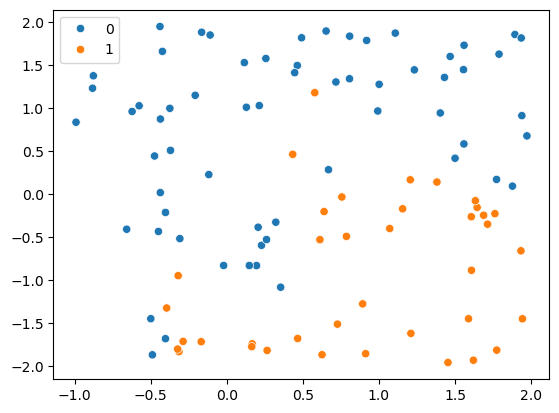

In [4]:
x_range = (-1, 2)
y_range = (-2, 2)

def cord_to_value(x, y):
    return grid[int((x - x_range[0]) / (x_range[1] - x_range[0]) * dim_x)][int((y - y_range[0]) / (y_range[1] - y_range[0]) * dim_y)]

x,y,z = [],[],[]
n_cords = 100
for _ in range(n_cords):
    x.append(random() * (x_range[1] - x_range[0]) + x_range[0])
    y.append(random() * (y_range[1] - y_range[0]) + y_range[0])
    z.append(cord_to_value(x[-1], y[-1]))

df = pd.DataFrame({"x": x, "y": y, "InSet": [bool(z) for z in z]})
display(df.value_counts("InSet"))
sns.scatterplot(x=x, y=y, hue=z)

In [5]:
## Logistic regression
from sklearn.linear_model import LogisticRegression

df_lr = df.copy()
LogisticRegression().fit(df_lr[["x", "y"]], df_lr["InSet"]).score(df_lr[["x", "y"]], df_lr["InSet"])

0.86

In [6]:
## SVM (no kernel)
from sklearn.svm import SVC
df_svm = df.copy()
SVC(kernel="linear").fit(df_svm[["x", "y"]], df_svm["InSet"]).score(df_svm[["x", "y"]], df_svm["InSet"])

0.85

In [7]:
## SVM (with kernel)
for kernel in ["poly", "rbf", "sigmoid"]:
    df_svm = df.copy()
    print(f"{kernel}: ",
    SVC(kernel=kernel).fit(df_svm[["x", "y"]], df_svm["InSet"]).score(df_svm[["x", "y"]], df_svm["InSet"])
    )

poly:  0.83
rbf:  0.91
sigmoid:  0.66


In [8]:
## Feed forward NN (Identity activation)
from sklearn.neural_network import MLPClassifier
df_nn = df.copy()
MLPClassifier(hidden_layer_sizes=(100,),activation="identity").fit(df_nn[["x", "y"]], df_nn["InSet"]).score(df_nn[["x", "y"]], df_nn["InSet"])

0.86

In [9]:
## Cheaty preprocessing
from sklearn.preprocessing import OneHotEncoder
df_nn = df.copy()
# Essentially we assign each point a true/false value and feed it to the NN
# This is cheating because it should now only ever work for these exact points
encoder = OneHotEncoder()
encoder.fit(df_nn[["x", "y"]])
df_nn = pd.DataFrame(encoder.transform(df_nn[["x", "y"]]).toarray())
df_nn["InSet"] = df["InSet"]
print("Identity activation: ",
    MLPClassifier(hidden_layer_sizes=(100,),activation="identity").fit(df_nn.drop("InSet", axis=1), df_nn["InSet"]).score(df_nn.drop("InSet", axis=1), df_nn["InSet"])
)
print("Logistic activation: ",
    MLPClassifier(hidden_layer_sizes=(100,),activation="logistic").fit(df_nn.drop("InSet", axis=1), df_nn["InSet"]).score(df_nn.drop("InSet", axis=1), df_nn["InSet"])
)


j:\Workspaces\Conda_Environments\env-ids-ws23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Identity activation:  1.0
Logistic activation:  1.0


j:\Workspaces\Conda_Environments\env-ids-ws23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
## Feed forward NN (Sigmoid activation)
from sklearn.neural_network import MLPClassifier
df_nn = df.copy()
MLPClassifier(hidden_layer_sizes=(100,),activation="logistic").fit(df_nn[["x", "y"]], df_nn["InSet"]).score(df_nn[["x", "y"]], df_nn["InSet"])

j:\Workspaces\Conda_Environments\env-ids-ws23\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.86

### (b)
Step function gives True, for everything greater or equal to 0.  
A neuron performs $x_1*w_1+x_2*w_2$ for inputs $x_1$ and $x_2$ with weights $w_1,w_2$ unique to the neuron and then applies the activation function to the result.

Line 1 $((w_1*0+w_2*1 \geq 0) = False)$ implies that $w_2$ would have to be negative.  
Line 2 $((w_1*1+w_2*1 \geq 0) = True)$ implies $w_1 \geq -w_2$.  
Last line $((w_1*1 + w_2*0 \geq 0) = False)$ requires $w_1$ to be negative which is in contradiction to the previous two assertions.